<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/Funtion_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [13]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/train.csv',usecols=['Age','Fare','Survived'])
df.head()
#

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [15]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)


In [16]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

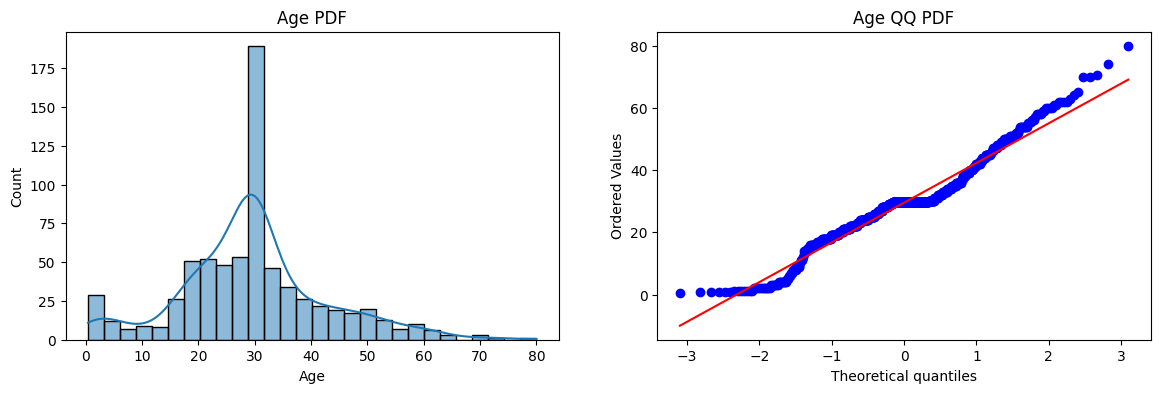

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ PDF')

plt.show()

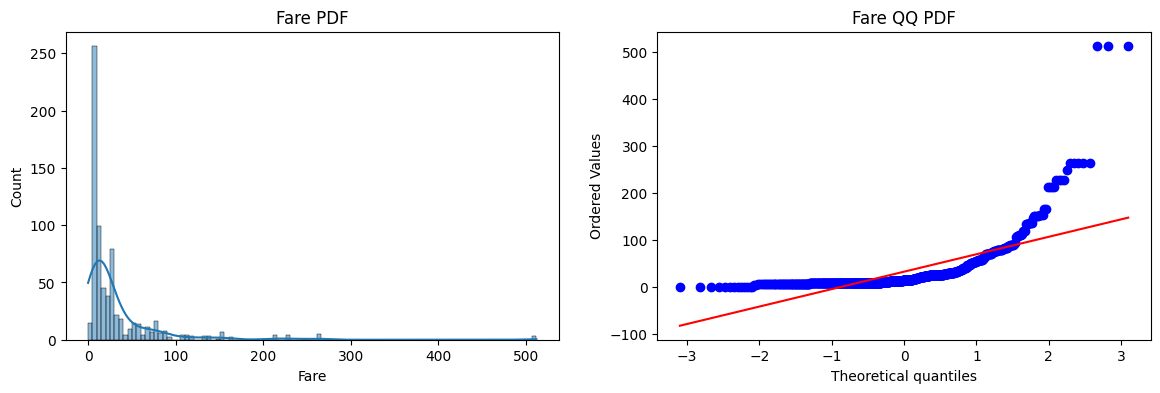

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ PDF')

plt.show()

In [26]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
#

In [27]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print('Logistic Regression Accuracy:',accuracy_score(y_test,y_pred))
print('Decision Tree Accuracy:',accuracy_score(y_test,y_pred1))


Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Accuracy: 0.6759776536312849


In [28]:
trf=FunctionTransformer(func=np.log1p)

In [29]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [32]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
#
clf.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred=clf.predict(x_test_trf)
y_pred1=clf2.predict(x_test_trf)

print('Logistic Regression Accuracy:',accuracy_score(y_test,y_pred))
print('Decision Tree Accuracy:',accuracy_score(y_test,y_pred1))


Logistic Regression Accuracy: 0.6815642458100558
Decision Tree Accuracy: 0.6759776536312849


In [34]:
x_trf=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('Logistic Regression ',np.mean(cross_val_score(clf,x_trf,y,scoring='accuracy',cv=10)))
print('Decision Tree ',np.mean(cross_val_score(clf2,x_trf,y,scoring='accuracy',cv=10)))

Logistic Regression  0.678027465667915
Decision Tree  0.658876404494382


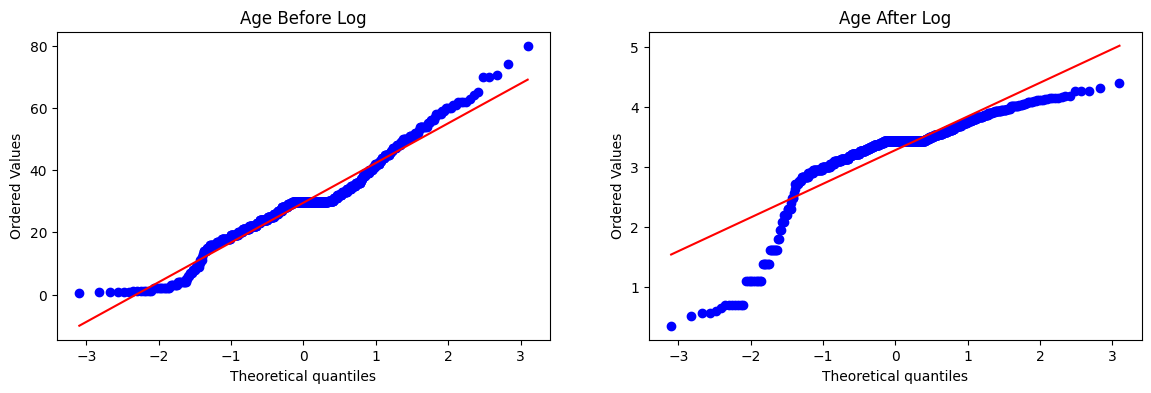

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age Before Log')

plt.subplot(1,2,2)
stats.probplot(x_train_trf['Age'],dist="norm",plot=plt)
plt.title('Age After Log')

plt.show()

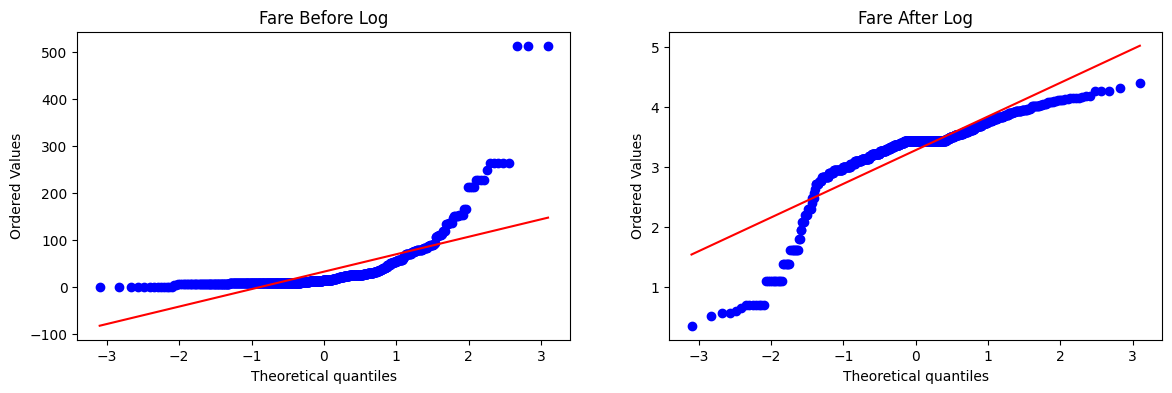

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare Before Log')

plt.subplot(1,2,2)
stats.probplot(x_train_trf['Age'],dist="norm",plot=plt)
plt.title('Fare After Log')

plt.show()

In [43]:
trf2 = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p), ['Fare'])
    ],
    remainder='passthrough'
)
x_train_trf2=trf2.fit_transform(x_train)
x_test_trf2=trf2.transform(x_test)

In [44]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
#
clf.fit(x_train_trf2,y_train)
clf2.fit(x_train_trf2,y_train)

y_pred=clf.predict(x_test_trf2)
y_pred1=clf2.predict(x_test_trf2)

print('Logistic Regression Accuracy:',accuracy_score(y_test,y_pred))
print('Decision Tree Accuracy:',accuracy_score(y_test,y_pred1))


Logistic Regression Accuracy: 0.6703910614525139
Decision Tree Accuracy: 0.6703910614525139


In [45]:
x_trf2=trf2.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('Logistic Regression ',np.mean(cross_val_score(clf,x_trf2,y,scoring='accuracy',cv=10)))
print('Decision Tree ',np.mean(cross_val_score(clf2,x_trf2,y,scoring='accuracy',cv=10)))

Logistic Regression  0.6712609238451936
Decision Tree  0.6633458177278402


In [57]:
def apply_transform(transform):
  x=df.iloc[:,1:3]
  y=df.iloc[:,0]

  trf = ColumnTransformer(transformers=[('log', FunctionTransformer(transform), ['Fare'])],remainder='passthrough')

  x_trans=trf.fit_transform(x)

  clf=LogisticRegression()

  print('Accuracy: ',np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))

  print()
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  stats.probplot(x['Fare'],dist="norm",plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(1,2,2)
  stats.probplot(x_trans[:,0],dist="norm",plot=plt)
  plt.title('Fare After Transform')

  plt.show()


Accuracy:  0.6589013732833957



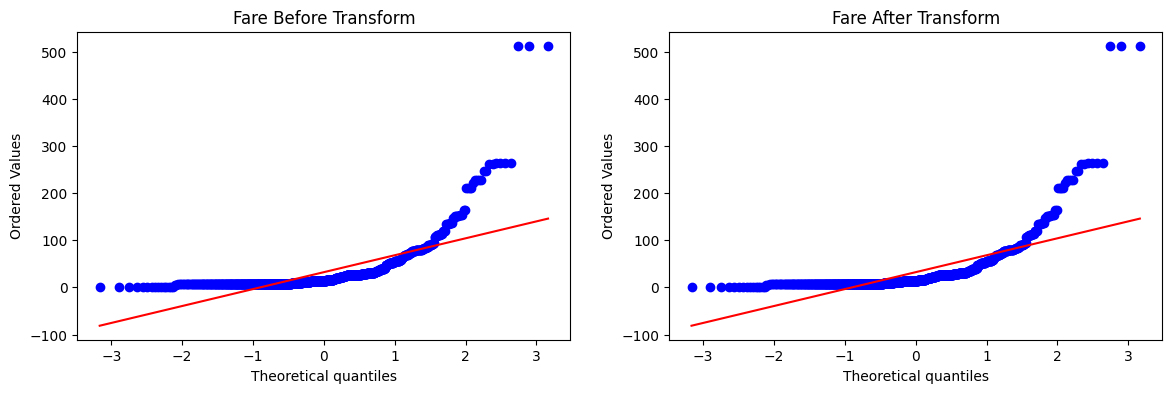

In [58]:
apply_transform(lambda x:x)

Accuracy:  0.6431335830212235



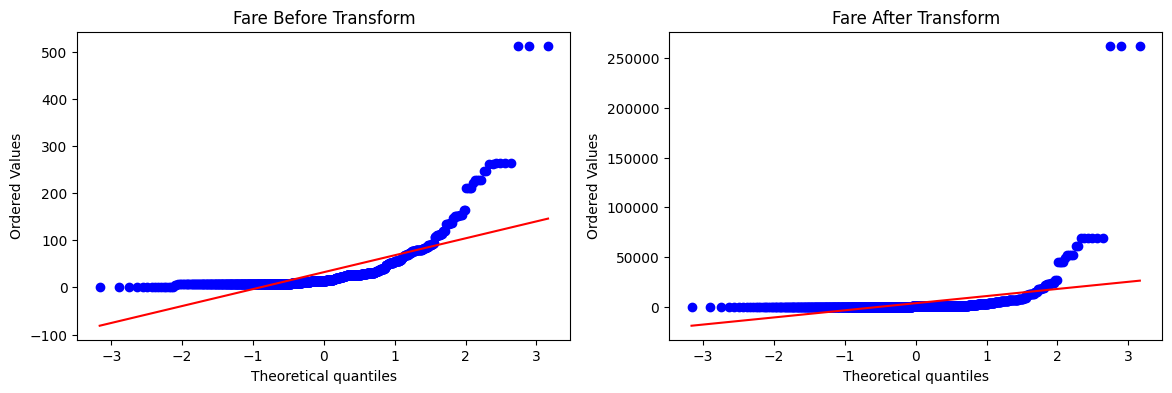

In [59]:
apply_transform(lambda x:x**2)

Accuracy:  0.6262796504369538



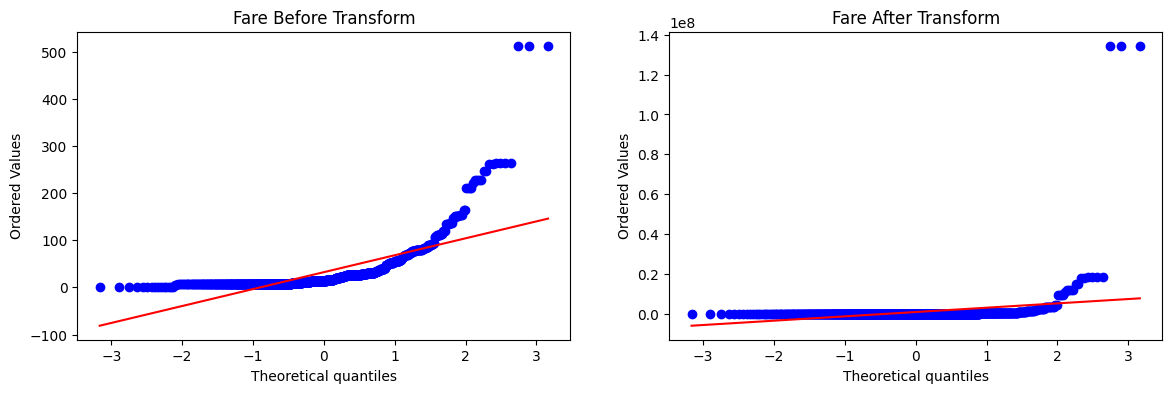

In [60]:
apply_transform(lambda x:x**3)

Accuracy:  0.6589013732833957



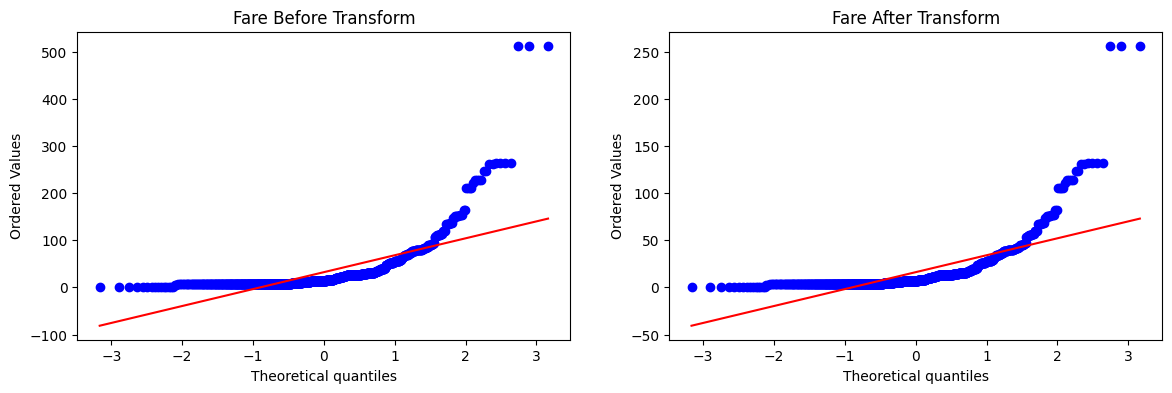

In [61]:
apply_transform(lambda x:x**1/2)

Accuracy:  0.61729088639201



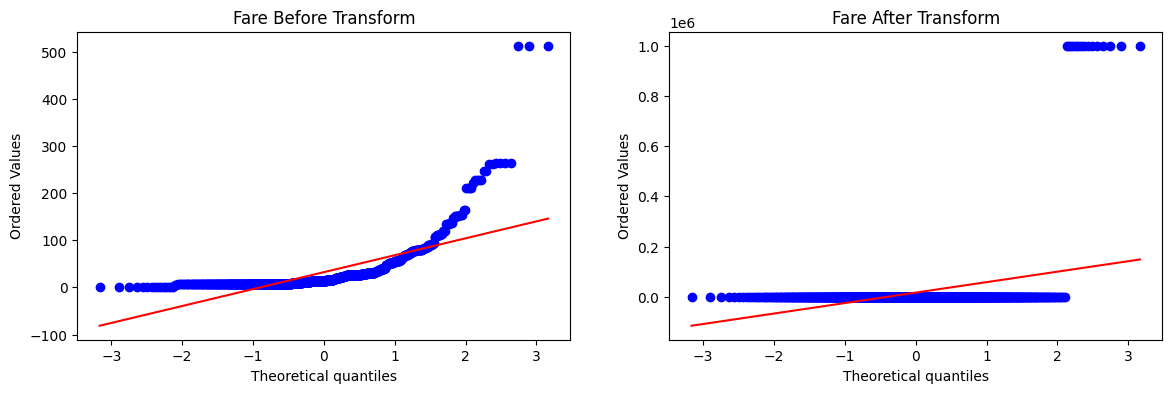

In [66]:
apply_transform(lambda x:(1/(x+0.000001)))

Accuracy:  0.6195131086142323



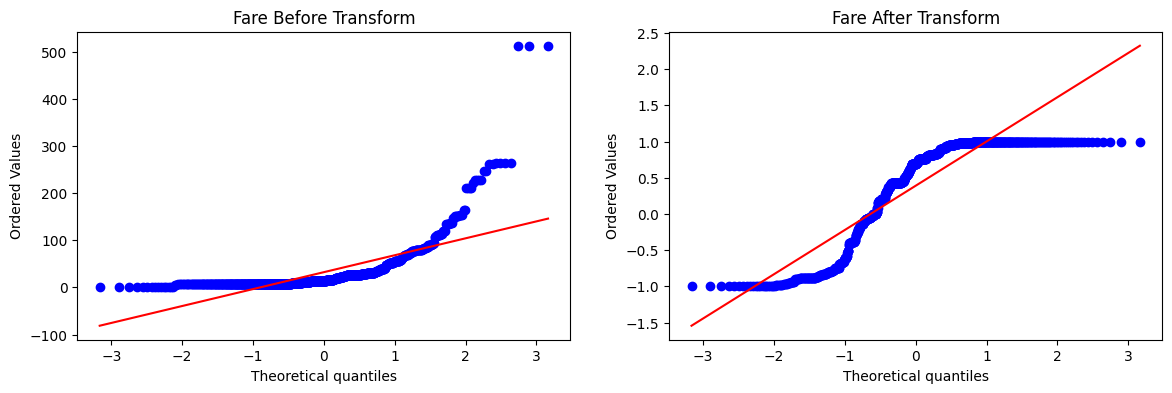

In [67]:
apply_transform(np.sin)